# Data Viz with Matplotlib 4

Welcome to the last workshop of this series. Today we are exploring histograms and, if time permits, we will check an interactive backend for `matplotlib`.

First, we will load the same data as yesterday. We will use the same code we used before to load data directly from GitHub.

In [2]:
import pandas as pd
import numpy as np

# Morgan data
morgan_data_url = r'https://raw.githubusercontent.com/non87/python-viz-workshop/main/data/morgan.csv?token=AFYWZVDAI4YWMTWTVOC4OLTBAYQXQ'
morgan = pd.read_csv(morgan_data_url)

# Taylor data
taylor_data_url = r'https://raw.githubusercontent.com/non87/python-viz-workshop/main/data/taylor.csv?token=AFYWZVEKG347XBSW52TUM3DBAYQZ6'
taylor = pd.read_csv(taylor_data_url)

# Look at the column names and data type
print(f'{morgan.info()}')
print(f"This is how the Morgan data looks like:\n\n{morgan.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Girls       50 non-null     int64  
 1   Total       50 non-null     int64  
 2   Proportion  50 non-null     float64
 3   Year        50 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.7 KB
None
This is how the Morgan data looks like:

   Girls  Total  Proportion  Year
0     44    252    0.174603  1965
1     34    258    0.131783  1966
2     43    314    0.136943  1967
3     36    299    0.120401  1968
4     63    396    0.159091  1969


To produce histograms we will need to massage the data a little and transform it in a different (clearly less convenient) format. More explanation on the format below. 

I will use `numpy` and `pandas` for this passage, do not worry about understanding the code.

In [18]:
# Morgan data
# Collect the data from the DataFrame
morgan_girls = np.int_(morgan.Proportion * morgan.Total)
morgan_girls_yr = np.int_(morgan.loc[morgan['Proportion'] > 0, 'Year'])
morgan_boys =  np.int_((1-morgan.Proportion) * morgan.Total)
morgan_boys_yr = np.int_(morgan.loc[morgan['Proportion'] < 1, 'Year'])
# Create the actual array
morgan_girls = np.repeat(morgan_girls_yr, morgan_girls)
morgan_boys = np.repeat(morgan_boys_yr, morgan_boys)  

# Taylor data
taylor_girls = np.int_(taylor.Proportion * taylor.Total)
taylor_girls_yr = np.int_(taylor.loc[taylor['Proportion'] > 0, 'Year'])
taylor_boys =  np.int_((1-taylor.Proportion) * taylor.Total)
taylor_boys_yr = np.int_(taylor.loc[taylor['Proportion'] < 1, 'Year'])


taylor_girls = np.repeat(taylor_girls_yr, taylor_girls)  
taylor_boys = np.repeat(taylor_boys_yr, taylor_boys)  

morgan_girls

array([1965, 1965, 1965, ..., 2014, 2014, 2014])

Let's not forget to import `plt` and set the backend to `inline`

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

### Histograms 

We will analyze the distribution of "Morgan" and "Taylor" birthdays with histograms. I believe histograms need no presentation. They represent the data distribution over a continous variables with rectangles. Matplotlib offers a simple syntax to draw histograms based on the method `ax.hist()`. 

In the code above, I prepare the data for `ax.hist()`. create four `np.array` containing the birth year of each boy named "Morgan" born in the US between 1965 and 2014; the birty year of each girl named "Morgan", etc. This `np.array` are nothing but a long list (_not_ in a technical Pythonic sense) of birth years. We did this because the method `ax.hist()` takes in input raw data. This is opposed to more convenient tabulated data (as the data was originally arranged in the `DataFrame` we loaded). This is the same difference as having a list containing 1965 three times (`[1965, 1965, 1965]`) versus having a dictionary telling us that there are 3 individual named "Morgan" born in 1965 (`{1965:3}`).

The only other argument of `ax.hist()` we (almost) always need to specify is _bins_ . This argument regulate the creation of bins for the histogram. You can pass an integer number `k`, `ax.hist()` will create `k` equally speced bins -- by default, `ax.hist()` will create 10 equally-spaced bins, but this is rarely what we want. Otherwise, you can pass an array showing the boundaries of each bin. We will explore this option later. 

Let's start with a simple histogram of the year distribution for the boys named "Morgan"

Text(0, 0.5, 'Raw number')

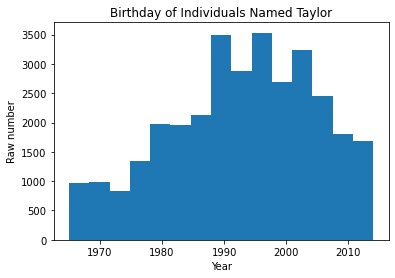

In [21]:
# The fundamental line
fig, ax = plt.subplots()
# the argument bins control the number of bins and their exact position 
# by default, matplotlib will use 10 equally-spaced bins
ax.hist(morgan_boys, bins = 15)
ax.set_title("Birthday of Individuals Named Taylor")
ax.set_xlabel('Year')
ax.set_ylabel('Raw number')